In [ ]:

#Import needed python libraries
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import math
import textwrap


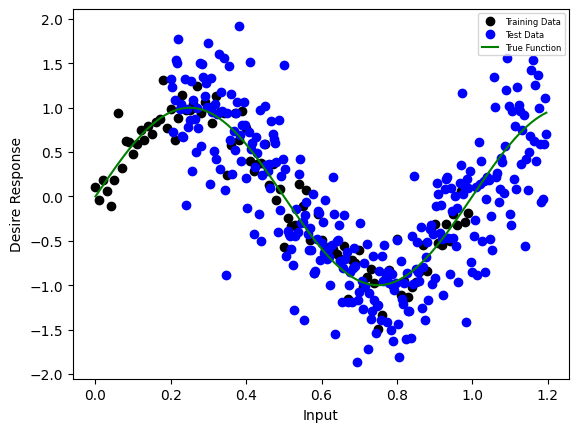

In [ ]:
Ntrain = 100 # number of points in training set
Ntest = 300 # number of points in test set
gVartrain = .2 # standard deviation of the Gaussian noise to be added in the training desired vector
gVartest = .5 # standard deviation of the Gaussian noise to be added in the test desired vector
steptrain = 1/Ntrain # increments of input for training set construction
steptest = 1/Ntest # increments of input for test set construction
slide = 0.2
xtrain = np.arange(0,1,steptrain) # input for training set
xtest = np.arange(0+slide,1+slide,steptest) # input for test set
dtrain = np.sin(2*math.pi*xtrain) + np.random.normal(0,gVartrain,Ntrain) # desired for training set
dtest = np.sin(2*math.pi*xtest) + np.random.normal(0,gVartest,Ntest) # desired for test set
d = np.sin(2*math.pi*np.arange(0,1+slide,1/max(Ntrain,Ntest))) #compute the true function value

#plot everything
p1 = plt.plot(xtrain, dtrain, 'ko') #plot training data
p2 = plt.plot(xtest, dtest, 'bo') #plot test data
p3 = plt.plot(np.arange(0,1+slide,1/max(Ntrain,Ntest)), d, 'g') #plot true function

#add legend and axes labels
plt.ylabel('Desire Response') #label x and y axes
plt.xlabel('Input')
plt.rcParams["axes.titlesize"] = 10
plt.legend((p1[0],p2[0],p3[0]),('Training Data', 'Test Data', 'True Function'), fontsize=6)


[ -0.17785102  11.57847046 -33.0524625   20.93765136   0.92189711]
0.21785734342362556
0.9127025908624548


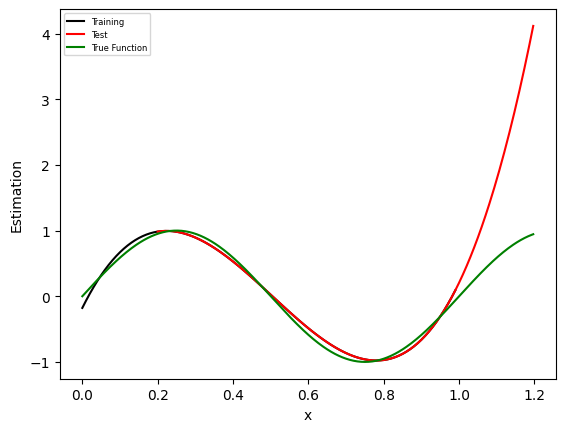

In [ ]:
# Example
M = 4
Xtrain = np.array([xtrain**m for m in range(M+1)]).T #big matrix X for training set
Xtest  = np.array([xtest**m for m in range(M+1)]).T #big matrix X for test set

w = np.linalg.inv(Xtrain.T@Xtrain)@Xtrain.T@dtrain # weight coefficients
ytrain = Xtrain@w #compute the predicted value
ytest = Xtest@w #compute the predicted value
error_train = ytrain-dtrain # instantaneous error in training
error_test = ytest-dtest # instantaneous error in test
RMStrain = np.sqrt(sum(error_train**2)/Ntrain) #RMS for model order M=4 in training
RMStest = np.sqrt(sum((error_test)**2)/Ntest) #RMS for model order M=4 in test

print(w)
print(RMStrain)
print(RMStest)

#plotting
p1=plt.plot(xtrain,ytrain,'k')
p2=plt.plot(xtest,ytest,'r')
p3=plt.plot(np.arange(0,1+slide,1/max(Ntrain,Ntest)),d,'g')
plt.ylabel('Estimation') #label x and y axes
plt.xlabel('x')
plt.rcParams["axes.titlesize"] = 10
plt.legend((p1[0],p2[0],p3[0]),('Training', 'Test','True Function'), fontsize=6)

[[0.72898157]
 [0.48290601]
 [0.48195149]
 [0.21790144]
 [0.21785734]
 [0.21106621]
 [0.21106199]
 [0.20972071]
 [0.20756359]
 [0.20751614]
 [0.20558227]
 [0.20536992]
 [0.20920713]]
[[ 0.85656601]
 [ 0.95235793]
 [ 0.99534843]
 [ 0.88630783]
 [ 0.91270259]
 [ 0.48719706]
 [ 0.49467612]
 [ 1.94765228]
 [ 6.96370047]
 [ 8.65824396]
 [16.1656323 ]
 [ 1.07595011]
 [ 5.36874656]]


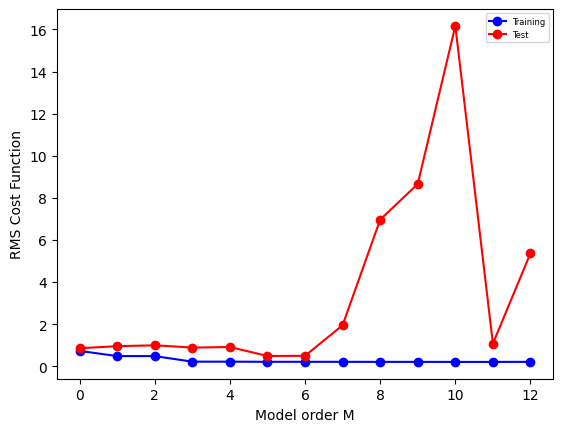

In [ ]:
no_orders = 13 #total number of model orders to be used
RMStrain = np.zeros((no_orders,1)) #initialize RMS vector for training set
RMStest = np.zeros((no_orders,1)) #initialize RMS vector for test set
for M in range(0,no_orders):
    Xtrain = np.array([xtrain**m for m in range(M+1)]).T #temporary big matrix X for training set
    Xtest  = np.array([xtest**m for m in range(M+1)]).T #temporary big matrix X for test set

    w = np.linalg.inv(Xtrain.T@Xtrain)@Xtrain.T@dtrain #weight coefficients
    ytrain = Xtrain@w #compute the predicted value in training
    ytest = Xtest@w #compute the predicted value in test
    error_train = ytrain - dtrain # instantaneous error in training
    error_test = ytest - dtest # instantaneous error in test
    RMStrain[M] = np.sqrt(sum((error_train)**2)/Ntrain) # allocation of RMS for different model orders in training
    RMStest[M] = np.sqrt(sum((error_test)**2)/Ntest) # allocation of RMS for different model orders in test

# plotting everything
p1=plt.plot(RMStrain,'-bo')
p2=plt.plot(RMStest,'-ro')

plt.ylabel('RMS Cost Function') #label x and y axes
plt.xlabel('Model order M')
plt.rcParams["axes.titlesize"] = 10
plt.legend((p1[0],p2[0]),('Training', 'Test'), fontsize=6)

print(RMStrain)
print(RMStest)

# For this particular example, the best model order is M=5 with RMStest = 0.72681522 and RMStrain = 0.13986374.